In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1=pd.read_csv('yearly_sesamum_prod.csv')

In [3]:
df1

,year,sesamum_production
0,1966,11.70
1,1967,16.20
2,1968,19.30
3,1969,18.80
4,1970,17.60
5,1971,14.40
6,1972,13.70
7,1973,13.60
8,1974,14.50
9,1975,6.70


In [4]:
df1['year'] = pd.to_datetime(df1['year'].astype(str) + '-01-01')

In [5]:
df1.dtypes

year                  datetime64[ns]
sesamum_production           float64
dtype: object

In [6]:
# df1['year_dt'] = pd.to_datetime(df1['year'])

In [7]:
df1.set_index('year',inplace=True)

In [8]:
df1.head()

,sesamum_production
year,
1966-01-01,11.7
1967-01-01,16.2
1968-01-01,19.3
1969-01-01,18.8
1970-01-01,17.6


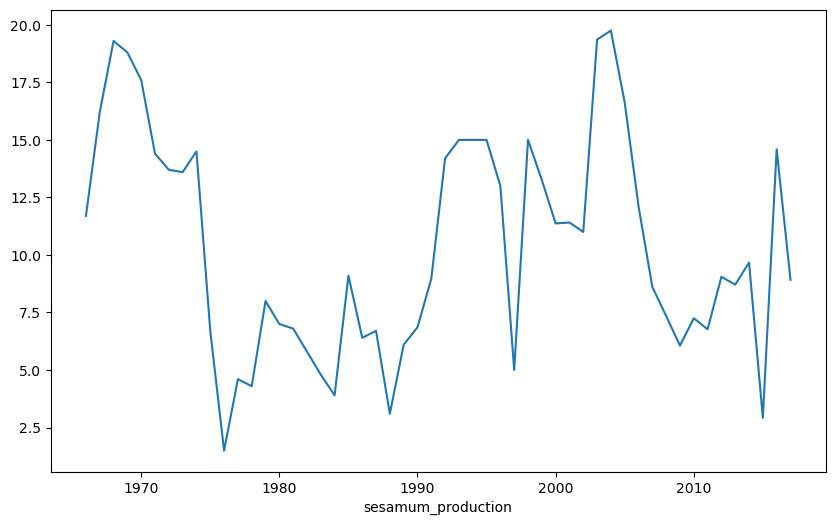

In [9]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
plt.xlabel('year')
plt.xlabel('sesamum_production')
plt.plot(df1)

In [10]:
rolmean = df1.rolling(window=3).mean()
rolstd = df1.rolling(window=3).std()
print(rolmean,rolstd)

            sesamum_production
year                          
1966-01-01                 NaN
1967-01-01                 NaN
1968-01-01           15.733333
1969-01-01           18.100000
1970-01-01           18.566667
1971-01-01           16.933333
1972-01-01           15.233333
1973-01-01           13.900000
1974-01-01           13.933333
1975-01-01           11.600000
1976-01-01            7.566667
1977-01-01            4.266667
1978-01-01            3.466667
1979-01-01            5.633333
1980-01-01            6.433333
1981-01-01            7.266667
1982-01-01            6.533333
1983-01-01            5.800000
1984-01-01            4.833333
1985-01-01            5.933333
1986-01-01            6.466667
1987-01-01            7.400000
1988-01-01            5.400000
1989-01-01            5.300000
1990-01-01            5.353333
1991-01-01            7.310000
1992-01-01           10.010000
1993-01-01           12.723333
1994-01-01           14.733333
1995-01-01           15.000000
1996-01-

In [11]:
rolmean = rolmean.iloc[2:,:]
rolstd = rolstd.iloc[2:,:]

In [12]:
print(rolmean,rolstd)

            sesamum_production
year                          
1968-01-01           15.733333
1969-01-01           18.100000
1970-01-01           18.566667
1971-01-01           16.933333
1972-01-01           15.233333
1973-01-01           13.900000
1974-01-01           13.933333
1975-01-01           11.600000
1976-01-01            7.566667
1977-01-01            4.266667
1978-01-01            3.466667
1979-01-01            5.633333
1980-01-01            6.433333
1981-01-01            7.266667
1982-01-01            6.533333
1983-01-01            5.800000
1984-01-01            4.833333
1985-01-01            5.933333
1986-01-01            6.466667
1987-01-01            7.400000
1988-01-01            5.400000
1989-01-01            5.300000
1990-01-01            5.353333
1991-01-01            7.310000
1992-01-01           10.010000
1993-01-01           12.723333
1994-01-01           14.733333
1995-01-01           15.000000
1996-01-01           14.333333
1997-01-01           11.000000
1998-01-

Text(0.5, 1.0, 'rolling mean and std')

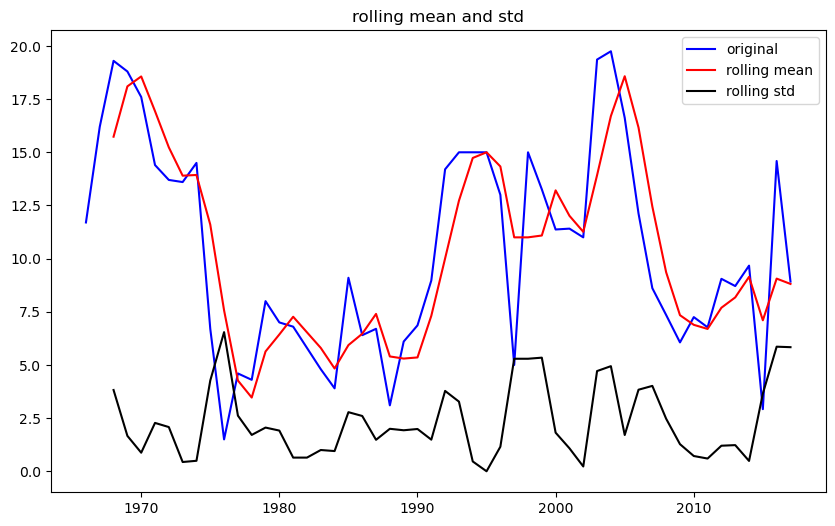

In [13]:
orig = plt.plot(df1,color="blue",label='original')
mean = plt.plot(rolmean,color='red',label='rolling mean')
std = plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('rolling mean and std')

In [14]:
from statsmodels.tsa.stattools import adfuller
print('dickey fuller test:')
dftest = adfuller(df1['sesamum_production'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test Stistic','p value','#Lags used','Number of Observations used'])
for key, value in dftest[4].items():
    dfoutput['Criticl Value (%s)'%key] = value
    
print(dfoutput)

dickey fuller test:
Test Stistic                   -3.056900
p value                         0.029912
#Lags used                      0.000000
Number of Observations used    51.000000
Criticl Value (1%)             -3.565624
Criticl Value (5%)             -2.920142
Criticl Value (10%)            -2.598015
dtype: float64


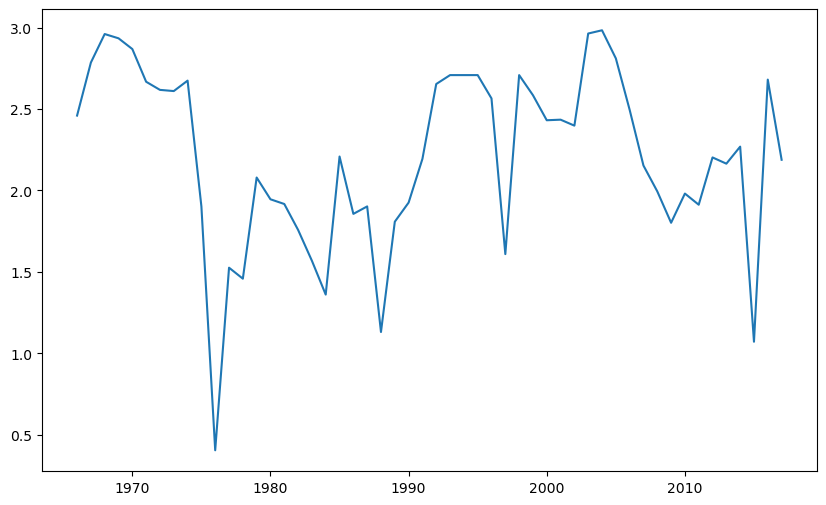

In [15]:
df_logscale = np.log(df1)
plt.plot(df_logscale)

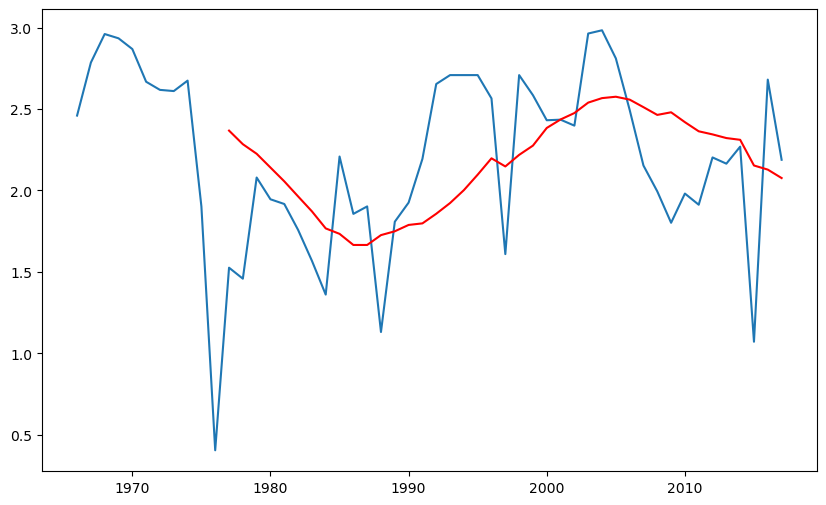

In [16]:
movingaverage = df_logscale.rolling(window=12).mean()
movingstd = df_logscale.rolling(window=12).std()
plt.plot(df_logscale)
plt.plot(movingaverage,color='red')

In [17]:
dflogscale_minusmivingaverage = df_logscale - movingaverage
dflogscale_minusmivingaverage.head(12)

dflogscale_minusmivingaverage.dropna(inplace=True)
dflogscale_minusmivingaverage.head(10)

,sesamum_production
year,
1977-01-01,-0.841355
1978-01-01,-0.825382
1979-01-01,-0.145758
1980-01-01,-0.194773
1981-01-01,-0.139016
1982-01-01,-0.205577
1983-01-01,-0.303268
1984-01-01,-0.406206
1985-01-01,0.474575


In [18]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingaverage = timeseries.rolling(window=3).mean()
    movingstd = timeseries.rolling(window=3).std()
    orig = plt.plot(timeseries,color='blue',label='original')
    mean = plt.plot(movingaverage,color='red',label='rolling mean')
    std = plt.plot(movingstd,color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title('rolling mean & std')
    
    print('results of dickey fuller test:')
    dftest  =adfuller(timeseries['sesamum_production'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p value','#Lags Used','Number of Observatios Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput)

results of dickey fuller test:
Test Statistic                -4.151721
p value                        0.000794
#Lags Used                     0.000000
Number of Observatios Used    40.000000
Critical value (1%)           -3.605565
Critical value (5%)           -2.937069
Critical value (10%)          -2.606986
dtype: float64


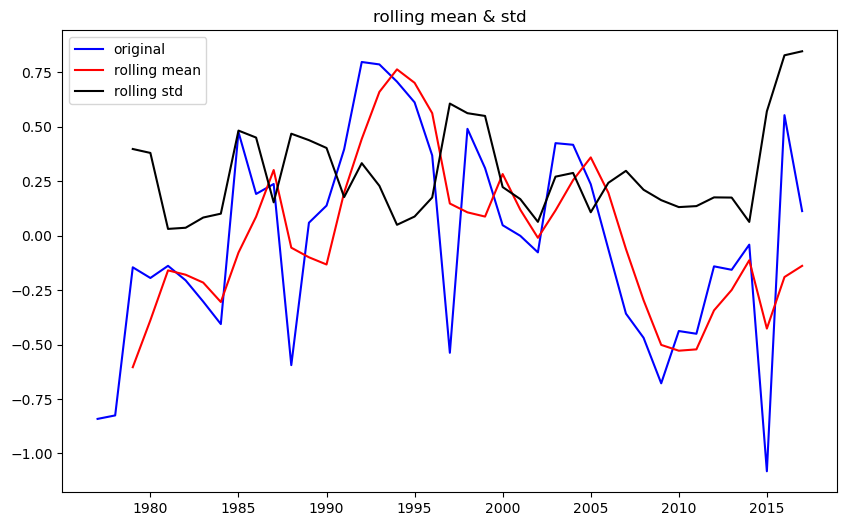

In [19]:
test_stationarity(dflogscale_minusmivingaverage)

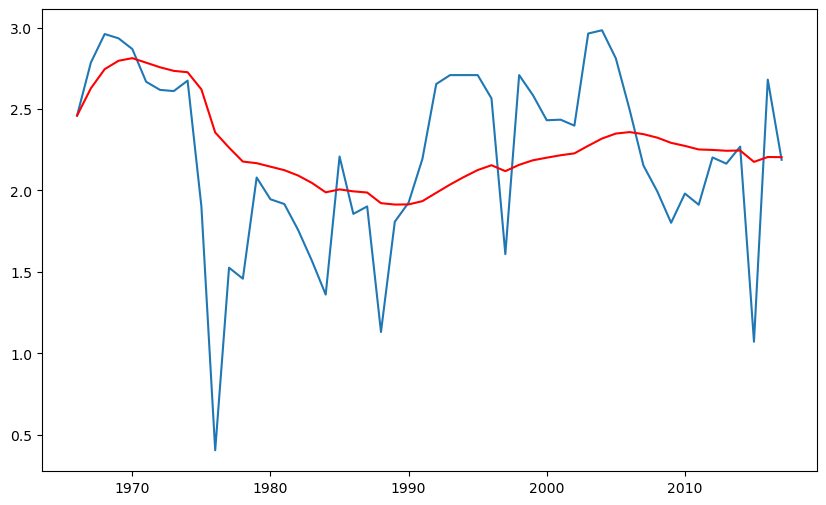

In [20]:
exponentialweighteddecayaverage = df_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(df_logscale)
plt.plot(exponentialweighteddecayaverage,color='red')

results of dickey fuller test:
Test Statistic                -2.848580
p value                        0.051663
#Lags Used                     1.000000
Number of Observatios Used    50.000000
Critical value (1%)           -3.568486
Critical value (5%)           -2.921360
Critical value (10%)          -2.598662
dtype: float64


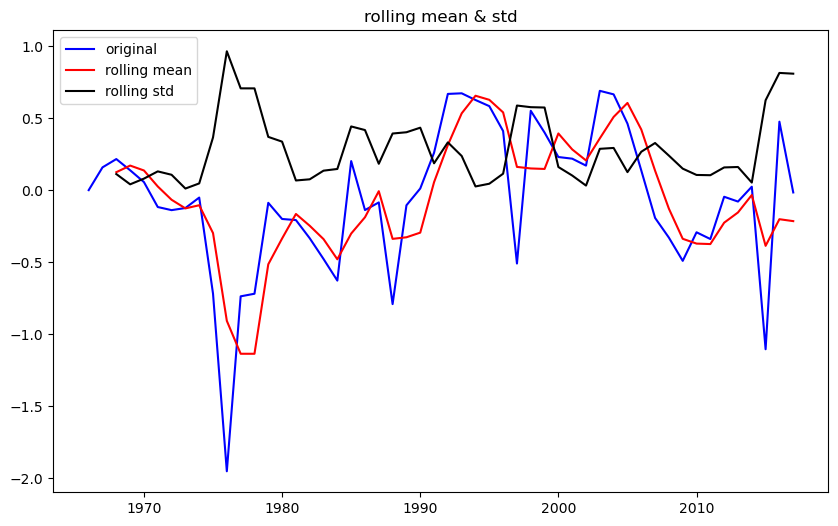

In [21]:
datalogscaleminusmovingexponentialdecayaverage = df_logscale - exponentialweighteddecayaverage
test_stationarity(datalogscaleminusmovingexponentialdecayaverage)

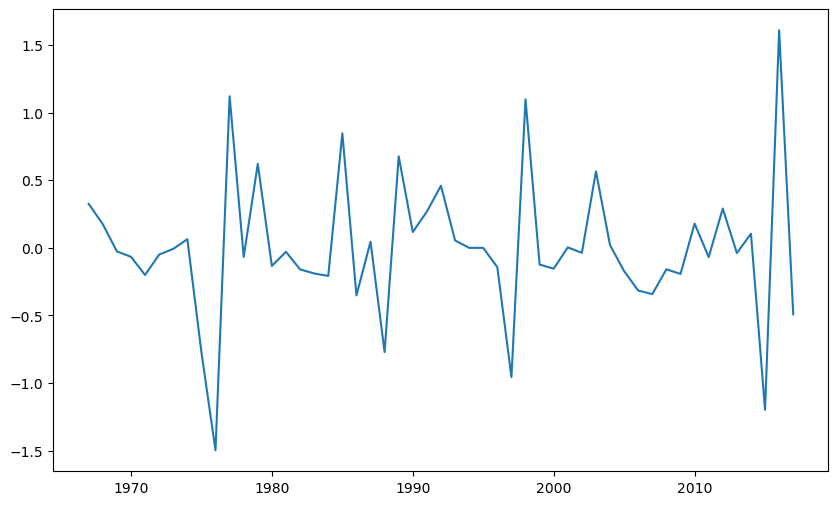

In [22]:
dflogdiffshifting = df_logscale - df_logscale.shift()
plt.plot(dflogdiffshifting)

results of dickey fuller test:
Test Statistic               -1.012859e+01
p value                       9.043171e-18
#Lags Used                    0.000000e+00
Number of Observatios Used    5.000000e+01
Critical value (1%)          -3.568486e+00
Critical value (5%)          -2.921360e+00
Critical value (10%)         -2.598662e+00
dtype: float64


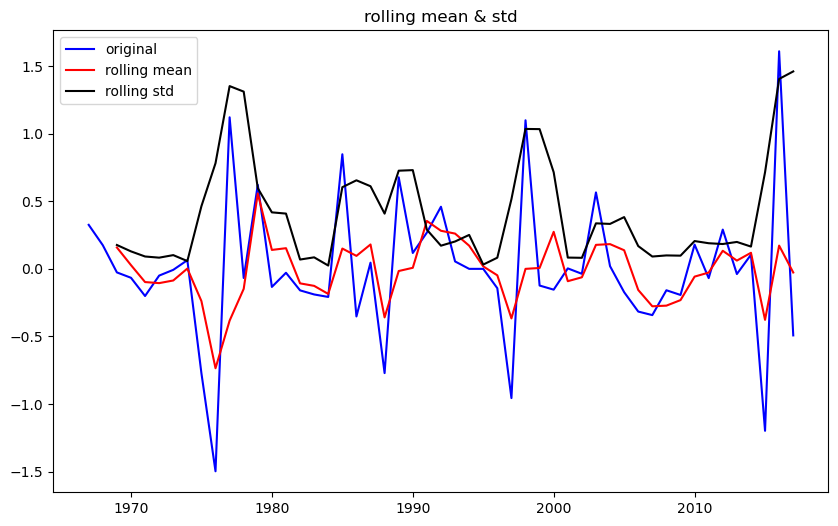

In [23]:
dflogdiffshifting.dropna(inplace=True)
test_stationarity(dflogdiffshifting)

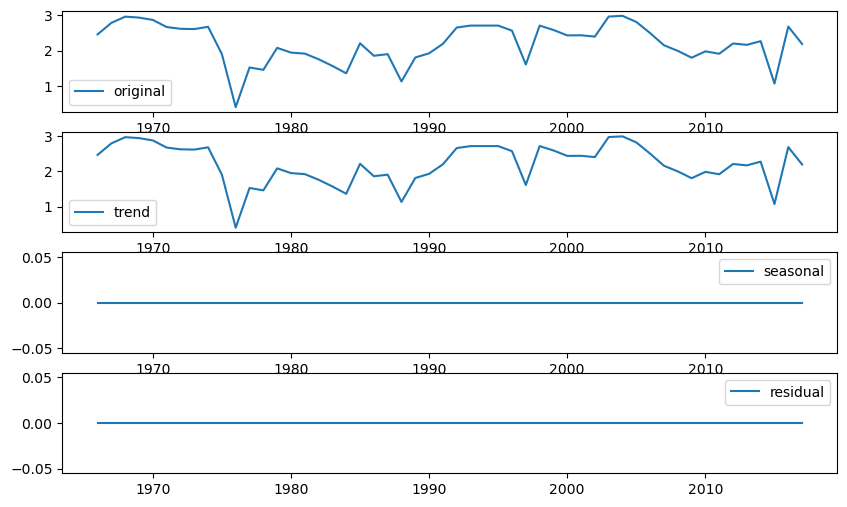

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')

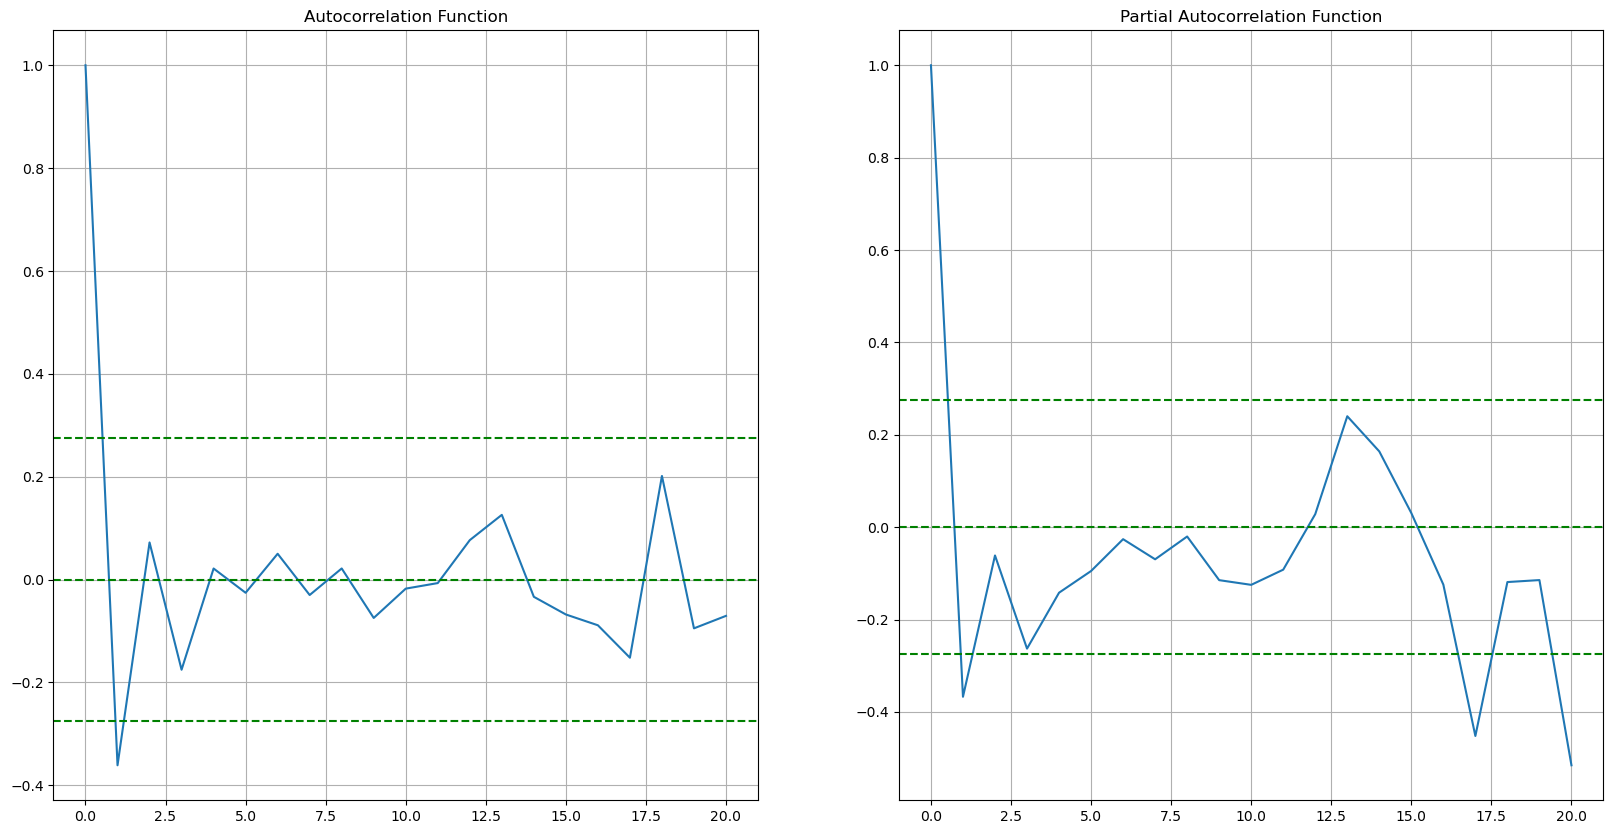

In [25]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(dflogdiffshifting, nlags=20)
lag_pacf=pacf(dflogdiffshifting, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Autocorrelation Function')
plt.grid()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dflogdiffshifting)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')
plt.grid()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting AR MODEL


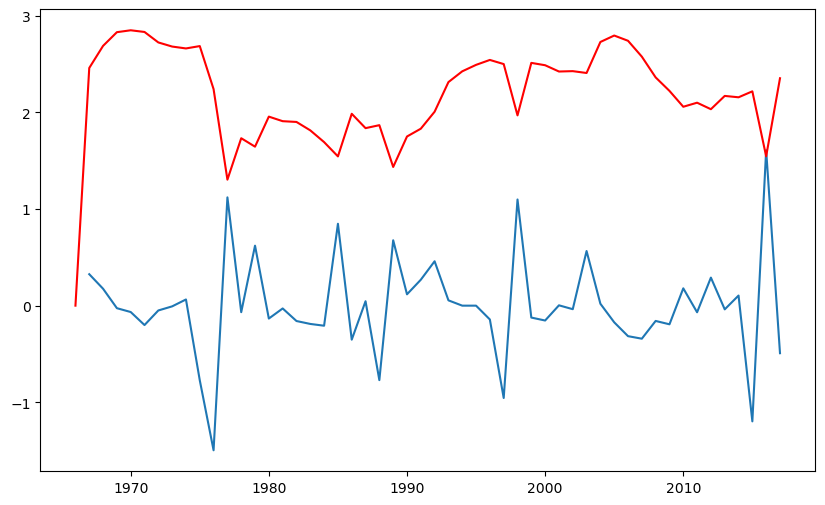

In [26]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_logscale, order=(1, 1, 1))
results_AR = model.fit()
plt.plot(dflogdiffshifting)
plt.plot(results_AR.fittedvalues,color='red')
print('plotting AR MODEL')

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting AR MODEL


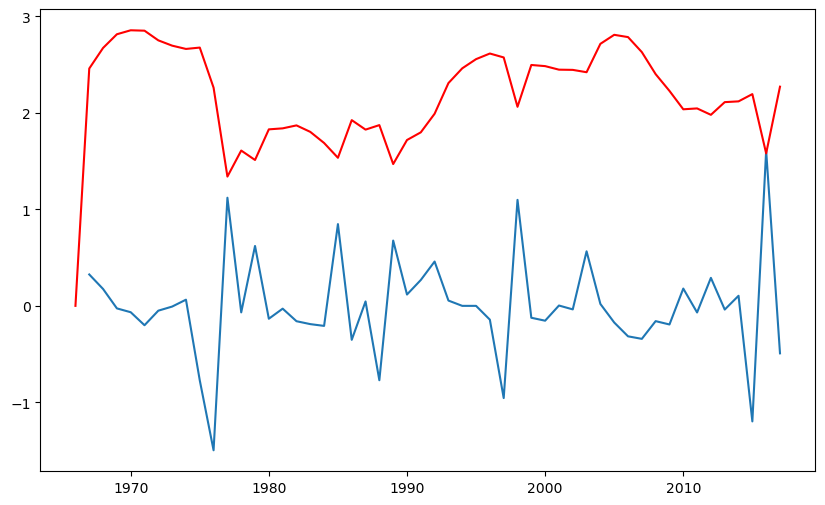

In [27]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_logscale is your time series data
model = ARIMA(df_logscale, order=(0, 1, 2))
results_MA = model.fit()

# Plot the results
plt.plot(dflogdiffshifting)
plt.plot(results_MA.fittedvalues, color='red')
print('plotting AR MODEL')

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


plotting AR MODEL


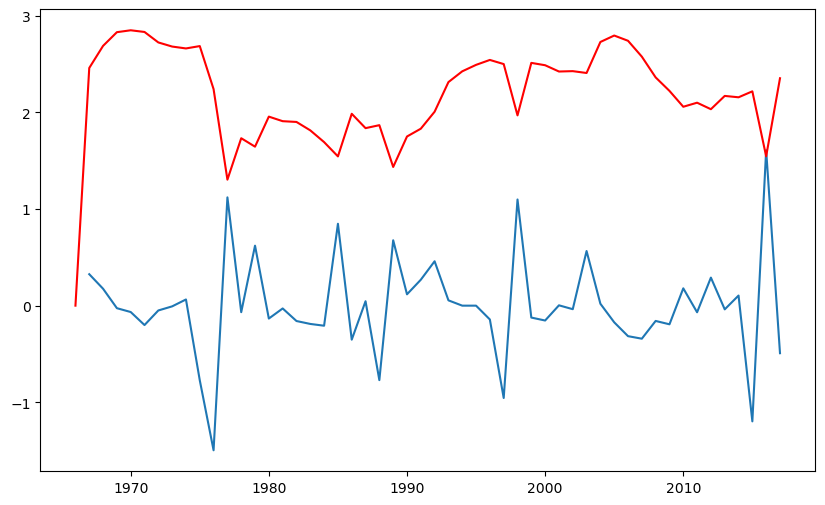

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_logscale is your time series data
model = ARIMA(df_logscale, order=(1, 1, 1))
results_ARIMA = model.fit()

# Plot the results
plt.plot(dflogdiffshifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
print('plotting AR MODEL')


In [29]:
predictions_arima_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
predictions_arima_diff.head()

year
1966-01-01    0.000000
1967-01-01    2.459589
1968-01-01    2.688222
1969-01-01    2.830040
1970-01-01    2.849719
dtype: float64

In [30]:
predictions_arima_diff_cumsum = predictions_arima_diff.cumsum()
predictions_arima_diff_cumsum.head()

year
1966-01-01     0.000000
1967-01-01     2.459589
1968-01-01     5.147810
1969-01-01     7.977850
1970-01-01    10.827569
dtype: float64

In [31]:
predictions_arima_log = pd.Series(df_logscale.iloc[:, 0],index=df_logscale.index)
predictions_arima_log = predictions_arima_log.add(predictions_arima_diff_cumsum,fill_value = 0)
predictions_arima_log.head()

year
1966-01-01     2.459589
1967-01-01     5.244600
1968-01-01     8.107916
1969-01-01    10.911707
1970-01-01    13.695468
dtype: float64

In [32]:
df_logscale

,sesamum_production
year,
1966-01-01,2.459589
1967-01-01,2.785011
1968-01-01,2.960105
1969-01-01,2.933857
1970-01-01,2.867899
1971-01-01,2.667228
1972-01-01,2.617396
1973-01-01,2.610070
1974-01-01,2.674149


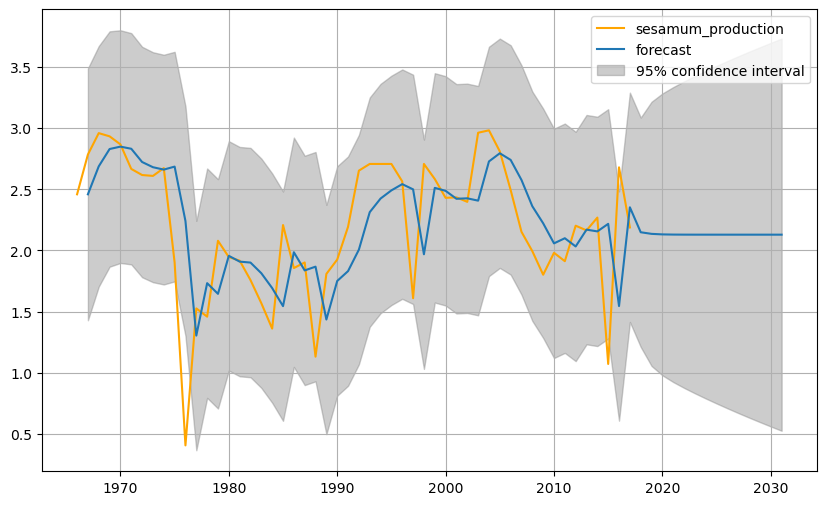

In [33]:
# Get predictions
pred = results_ARIMA.get_prediction(start=1, end=65)

# Get the predicted mean and the confidence intervals
predicted_mean = pred.predicted_mean
conf_int = pred.conf_int()

# Plot the results
plt.plot(df_logscale['sesamum_production'],color='orange',label='sesamum_production')
plt.plot(predicted_mean,label='forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.4,label='95% confidence interval')
plt.legend()
plt.grid()


In [34]:
x = results_ARIMA.forecast(steps=120)

In [35]:
def iterative_ARIMA_fit(series):

    ARIMA_fit_results = {}
    for AR in ARrange:
        for MA in MArange :
            for Diff in Diffrange:
                model = ARIMA(series, order = (AR,Diff,MA))
                fit_is_available = False
                results_ARIMA = None
                try:
                    results_ARIMA = model.fit(disp = -1, method = 'css')
                    fit_is_available = True
                except:
                    continue
                if fit_is_available:
                    safe_RSS = get_safe_RSS(series, results_ARIMA.fittedvalues)
                    ARIMA_fit_results['%d-%d-%d' % (AR,Diff,MA)]=[safe_RSS,results_ARIMA]

    return ARIMA_fit_results

In [36]:
def get_best_ARIMA_model_fit(series):

    if t.isstationary(series)[0]:
        ARIMA_fit_results = iterative_ARIMA_fit(series)
        best_ARIMA = min(ARIMA_fit_results, key = ARIMA_fit_results.get)
        
        return ARIMA_fit_results[best_ARIMA]

In [37]:
def get_safe_RSS(series, fitted_values):
    fitted_values_copy = fitted_values  # original fit is left untouched
    missing_index = list(set(series.index).difference(set(fitted_values_copy.index)))
    if missing_index:
        nan_series = pd.Series(index = pd.to_datetime(missing_index))
        fitted_values_copy = fitted_values_copy.append(nan_series)
        fitted_values_copy.sort_index(inplace = True)
        fitted_values_copy.fillna(method = 'bfill', inplace = True)  # fill holes
        fitted_values_copy.fillna(method = 'ffill', inplace = True)
    return sum((fitted_values_copy - series)**2)

In [38]:
df1.size

52